<a href="https://colab.research.google.com/github/ChiriKamau/soma/blob/main/notebooks/soma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


path = "/content/drive/MyDrive/Soma/Population_scounty_age_gender.csv"


import pandas as pd
df = pd.read_csv(path)

print(df.shape)
print(df.columns)
df.head(10)


Mounted at /content/drive
(48208, 6)
Index(['ewcounty', 'sub-county', 'Age', 'Male', 'Female', 'Total'], dtype='object')


,ewcounty,sub-county,Age,Male,Female,Total
0,BARINGO,ALL,Total,336322,330428,666750
1,BARINGO,ALL,0,8303,7982,16285
2,BARINGO,ALL,1,8669,8417,17086
3,BARINGO,ALL,2,10226,9762,19988
4,BARINGO,ALL,3,10265,10086,20351
5,BARINGO,ALL,4,11045,10276,21321
6,BARINGO,ALL,0 - 4,48508,46523,95031
7,BARINGO,ALL,5,10701,10047,20748
8,BARINGO,ALL,6,10949,10422,21371
9,BARINGO,ALL,7,9595,9082,18677


In [3]:

df_clean = df[df["Age"].astype(str).str.isdigit() | (df["Age"] == "Total")]

df_clean = df_clean.reset_index(drop=True)


print("Original :", len(df))
print("Filtered:", len(df_clean))
df_clean.head(20)


Original : 48208
Filtered: 39586


,ewcounty,sub-county,Age,Male,Female,Total
0,BARINGO,ALL,Total,336322,330428,666750
1,BARINGO,ALL,0,8303,7982,16285
2,BARINGO,ALL,1,8669,8417,17086
3,BARINGO,ALL,2,10226,9762,19988
4,BARINGO,ALL,3,10265,10086,20351
5,BARINGO,ALL,4,11045,10276,21321
6,BARINGO,ALL,5,10701,10047,20748
7,BARINGO,ALL,6,10949,10422,21371
8,BARINGO,ALL,7,9595,9082,18677
9,BARINGO,ALL,8,10276,10027,20303


In [4]:
!pip install geopandas matplotlib

import geopandas as gpd
import matplotlib.pyplot as plt


In [5]:
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_KEN_2.json"
kenya_sub = gpd.read_file(url)
kenya_sub.head()


,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,KEN.1.1_1,KEN,Kenya,KEN.1_1,Baringo,NA,805,NA,NA,Constituency,Constituency,162,NA,"MULTIPOLYGON (((35.8773 -0.0297, 35.8721 -0.02..."
1,KEN.1.2_1,KEN,Kenya,KEN.1_1,Baringo,NA,BaringoCentral,NA,NA,Constituency,Constituency,159,NA,"MULTIPOLYGON (((35.7977 0.3395, 35.7975 0.3322..."
2,KEN.1.3_1,KEN,Kenya,KEN.1_1,Baringo,NA,BaringoNorth,NA,NA,Constituency,Constituency,158,NA,"MULTIPOLYGON (((35.8135 0.6028, 35.8112 0.5971..."
3,KEN.1.4_1,KEN,Kenya,KEN.1_1,Baringo,NA,BaringoSouth,NA,NA,Constituency,Constituency,160,NA,"MULTIPOLYGON (((36.2293 0.4229, 36.2274 0.4026..."
4,KEN.1.5_1,KEN,Kenya,KEN.1_1,Baringo,NA,EldamaRavine,NA,NA,Constituency,Constituency,162,NA,"MULTIPOLYGON (((35.8234 0.0244, 35.834 0.0255,..."


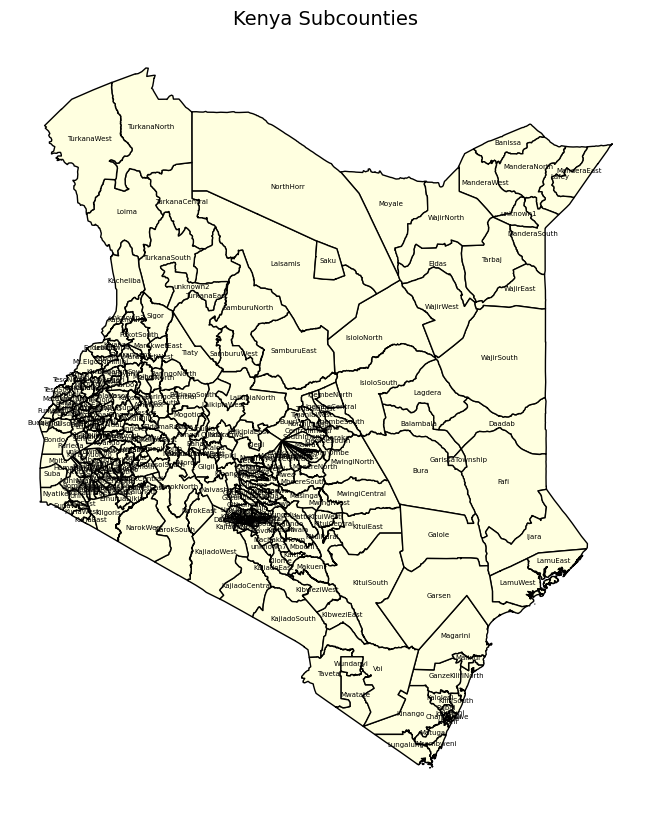

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
kenya_sub.plot(ax=ax, color="lightyellow", edgecolor="black")

# Label each subcounty at its center
for idx, row in kenya_sub.iterrows():
    plt.annotate(
        text=row["NAME_2"],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        fontsize=5, ha="center"
    )

plt.title("Kenya Subcounties", fontsize=14)
plt.axis("off")
plt.show()


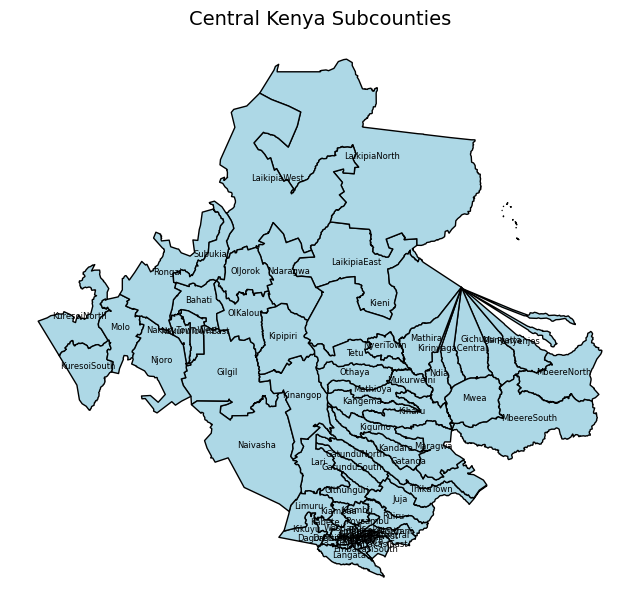

In [7]:
central_counties = ["Nyeri", "Kirinyaga", "Murang'a", "Kiambu", "Nyandarua", "Embu", "Laikipia","Nakuru","Nairobi"]

central_sub = kenya_sub[kenya_sub["NAME_1"].isin(central_counties)]

fig, ax = plt.subplots(figsize=(8,8))
central_sub.plot(ax=ax, color="lightblue", edgecolor="black")

for idx, row in central_sub.iterrows():
    plt.annotate(
        text=row["NAME_2"],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        fontsize=6, ha="center"
    )

plt.title("Central Kenya Subcounties", fontsize=14)
plt.axis("off")
plt.show()


In [18]:

county_pop = df[(df["sub-county"].str.upper() == "ALL") & (df["Age"].str.upper() == "TOTAL")]

county_pop = county_pop[["ewcounty", "Total"]].copy()

print("Number of counties in dataset:", county_pop.shape[0])
county_pop.head()

Number of counties in dataset: 47


,ewcounty,Total
0,BARINGO,666750
984,BOMET,875666
1722,BUNGOMA,1670535
3321,BUSIA,893653
4305,ELGEYO-MARAKWET,454468


In [20]:
import geopandas as gpd


url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_KEN_1.json"
gdf = gpd.read_file(url)

print("Counties in shapefile:", gdf.shape[0])
gdf.head()


Counties in shapefile: 47


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,KEN.1_1,KEN,Kenya,Baringo,NA,NA,County,County,30,KE.BA,KE-01,"MULTIPOLYGON (((35.7616 -0.1904, 35.7243 -0.19..."
1,KEN.2_1,KEN,Kenya,Bomet,NA,NA,County,County,36,KE.BO,KE-02,"MULTIPOLYGON (((35.2613 -1.0159, 35.2583 -1.02..."
2,KEN.3_1,KEN,Kenya,Bungoma,NA,NA,County,County,39,KE.BN,KE-03,"MULTIPOLYGON (((34.8778 0.8339, 34.9138 0.8524..."
3,KEN.4_1,KEN,Kenya,Busia,NA,NA,County,County,40,KE.BS,KE-04,"MULTIPOLYGON (((34.0292 -0.0142, 34.0158 -0.02..."
4,KEN.5_1,KEN,Kenya,Elgeyo-Marakwet,NA,NA,County,County,28,KE.EM,NA,"MULTIPOLYGON (((35.5272 0.2167, 35.5261 0.2183..."


Total counties in shapefile (rows): 47
Matched counties: 47
Unmatched counties (examples):
Empty DataFrame
Columns: [NAME_1, name_norm]
Index: []


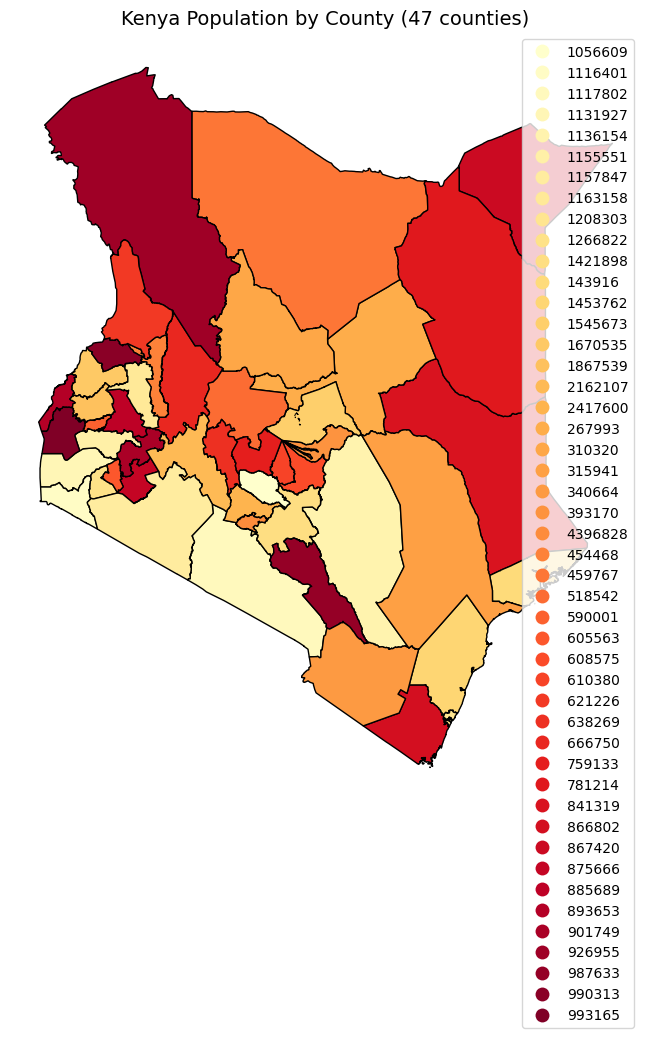

In [29]:

import re


def normalize_series(s):
    """Uppercase, strip, remove ALL non-alphanumeric characters (spaces, punctuation)."""
    return s.astype(str).str.upper().str.strip().str.replace(r'[^A-Z0-9]', '', regex=True)


gdf['name_norm'] = normalize_series(gdf['NAME_1'])
county_pop['ewcounty_norm'] = normalize_series(county_pop['ewcounty'])


gdf_merged = gdf.merge(county_pop, left_on='name_norm', right_on='ewcounty_norm', how='left')


print("Total counties in shapefile (rows):", gdf.shape[0])
print("Matched counties:", int(gdf_merged['Total'].notna().sum()))
print("Unmatched counties (examples):")
print(gdf_merged.loc[gdf_merged['Total'].isna(), ['NAME_1','name_norm']].to_string(index=False))

# Optional: show CSV county entries that didn't find a match in gdf
unmatched_csv = county_pop[~county_pop['ewcounty_norm'].isin(gdf['name_norm'])]
if not unmatched_csv.empty:
    print("\nCSV county rows with no matching geometry (examples):")
    print(unmatched_csv[['ewcounty','ewcounty_norm']].head(20).to_string(index=False))

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged.plot(
    column='Total',
    cmap='YlOrRd',
    legend=True,
    ax=ax,
    edgecolor='black',
    missing_kwds={'color':'lightgrey', 'label':'No data'}
)
ax.set_title("Kenya Population by County (47 counties)", fontsize=14)
ax.axis('off')
plt.show()


In [21]:

pop_sub = df_clean[df_clean["Age"] == "Total"].copy()

# Standardize name for merging
pop_sub["sub_county"] = pop_sub["sub-county"].str.strip().str.lower()


In [22]:
kenya_sub["sub_county"] = kenya_sub["NAME_2"].str.strip().str.lower()


In [23]:
merged = kenya_sub.merge(pop_sub, on="sub_county", how="left")

print("Total subcounties in shapefile:", kenya_sub.shape[0])
print("Matched with data:", merged["Total"].notna().sum())

# Check if any missing matches
missing = merged[merged["Total"].isna()]["sub_county"].unique()
print("Unmatched subcounties:", missing[:20])  # show first 20


Total subcounties in shapefile: 300
Matched with data: 114
Unmatched subcounties: ['805' 'baringocentral' 'baringonorth' 'baringosouth' 'eldamaravine'
 'tiaty' 'bometcentral' 'bometeast' 'kabuchai' 'kanduyi' 'mt.elgon'
 'sirisia' 'webutewest' 'webuyeeast' 'budalangi' 'funyula' 'matayos'
 'tesonorth' 'tesosouth' 'keiyonorth']


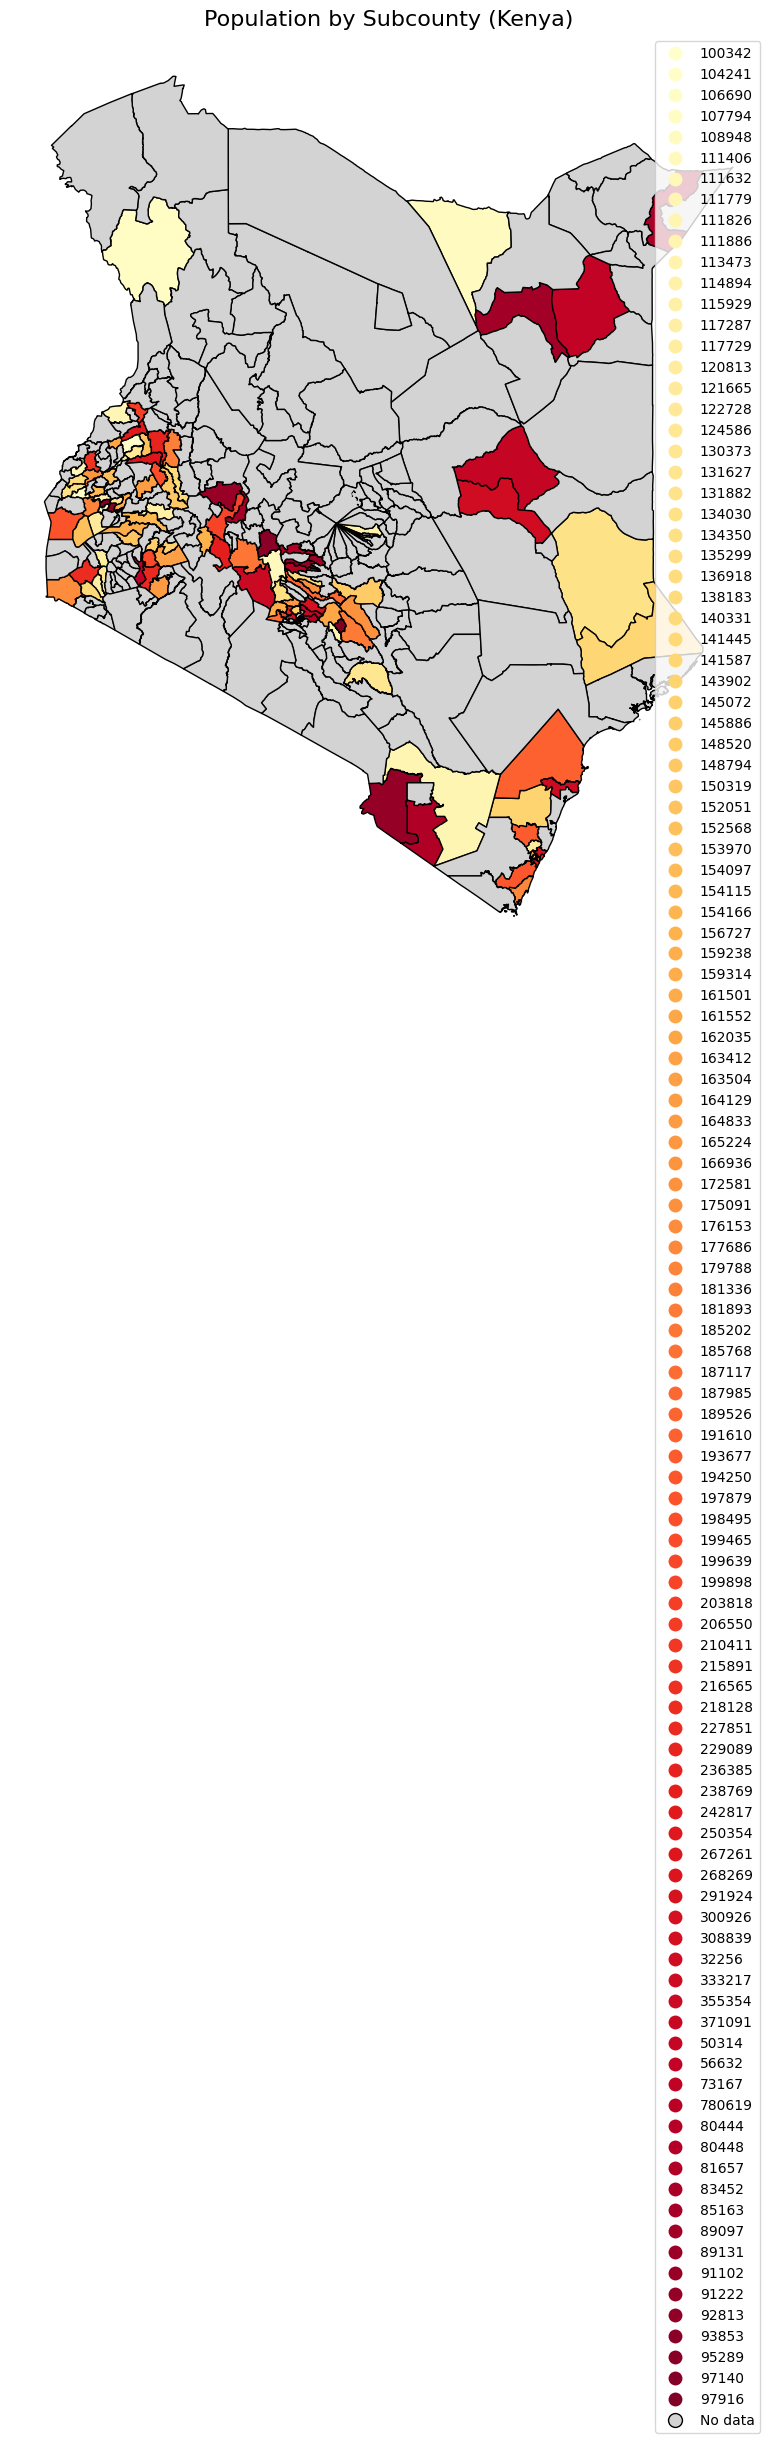

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
merged.plot(
    column="Total",
    cmap="YlOrRd",
    legend=True,
    ax=ax,
    edgecolor="black",
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

plt.title("Population by Subcounty (Kenya)", fontsize=16)
plt.axis("off")
plt.show()


In [28]:
print(gdf.columns)
gdf.head(3)


Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry',
       'NAME_1_norm', 'NAME_norm', 'name_norm'],
      dtype='object')


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,NAME_1_norm,NAME_norm,name_norm
0,KEN.1_1,KEN,Kenya,Baringo,NA,NA,County,County,30,KE.BA,KE-01,"MULTIPOLYGON (((35.7616 -0.1904, 35.7243 -0.19...",BARINGO,BARINGO,BARINGO
1,KEN.2_1,KEN,Kenya,Bomet,NA,NA,County,County,36,KE.BO,KE-02,"MULTIPOLYGON (((35.2613 -1.0159, 35.2583 -1.02...",BOMET,BOMET,BOMET
2,KEN.3_1,KEN,Kenya,Bungoma,NA,NA,County,County,39,KE.BN,KE-03,"MULTIPOLYGON (((34.8778 0.8339, 34.9138 0.8524...",BUNGOMA,BUNGOMA,BUNGOMA


Total subcounties in shapefile: 300
Matched subcounties: 182
Unmatched subcounties (examples):
         NAME_2 sub_county_norm
            805             805
   BaringoSouth    BARINGOSOUTH
   EldamaRavine    ELDAMARAVINE
          Tiaty           TIATY
       Kabuchai        KABUCHAI
        Kanduyi         KANDUYI
        Sirisia         SIRISIA
     WebuteWest      WEBUTEWEST
     WebuyeEast      WEBUYEEAST
      Budalangi       BUDALANGI
        Funyula         FUNYULA
        Matayos         MATAYOS
       Manyatta        MANYATTA
      Runyenjes       RUNYENJES
         Daadab          DAADAB
GarissaTownship GARISSATOWNSHIP
    HomaBayTown     HOMABAYTOWN
 KabondoKasipul  KABONDOKASIPUL
    Karachuonyo     KARACHUONYO
        Kasipul         KASIPUL

CSV subcounty rows with no matching geometry (examples):
     sub-county sub_county_norm
            ALL             ALL
     EAST POKOT       EASTPOKOT
       KOIBATEK        KOIBATEK
        MARIGAT         MARIGAT
     TIATY EAST

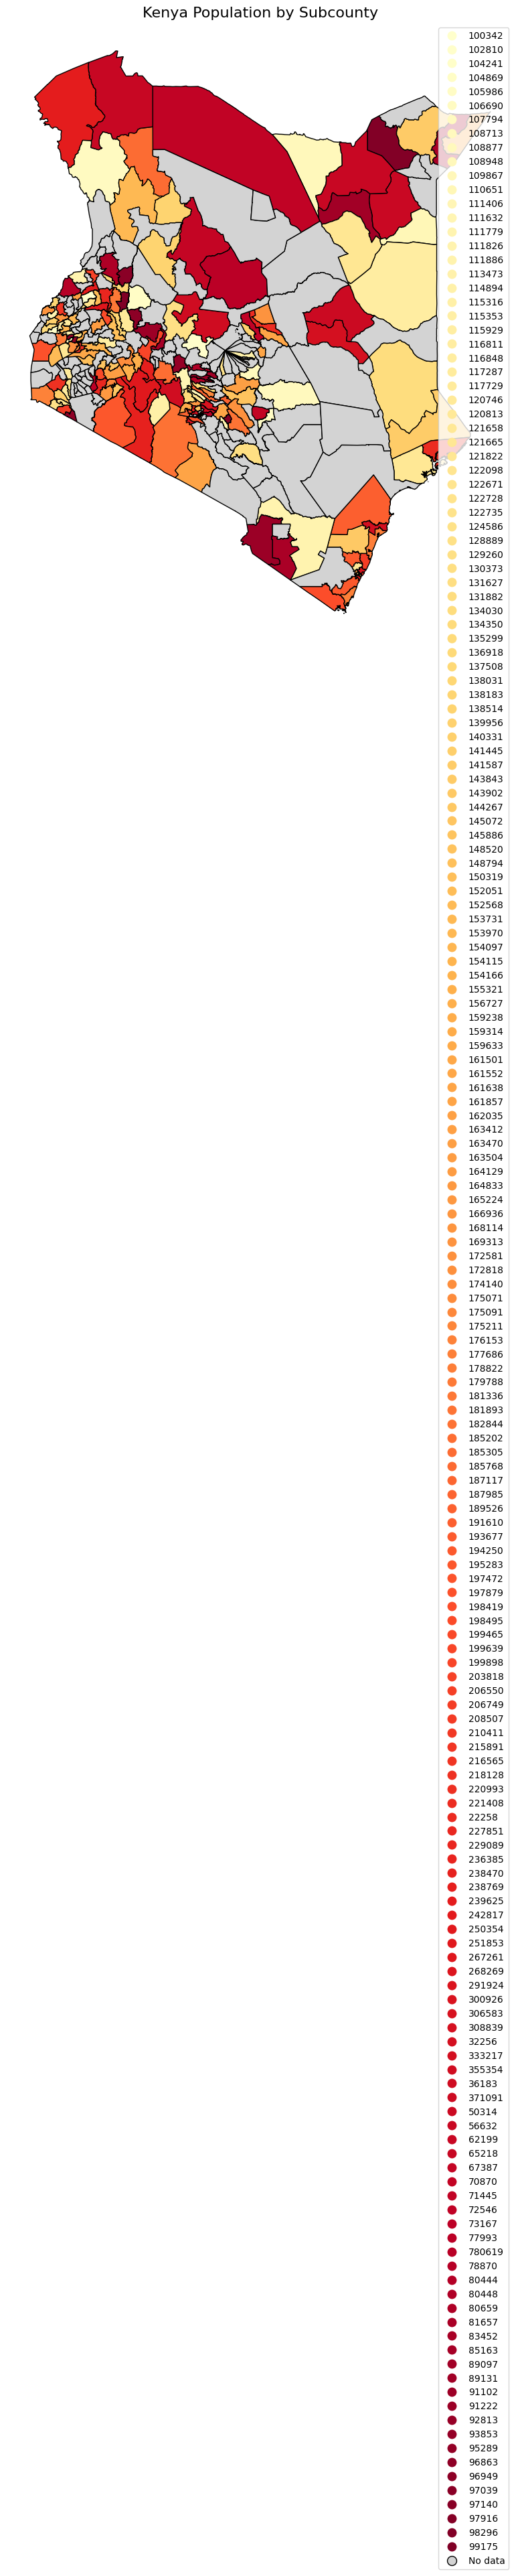

In [31]:
import re

def normalize_series(s):
    """Uppercase, strip, remove ALL non-alphanumeric characters (spaces, punctuation)."""
    return s.astype(str).str.upper().str.strip().str.replace(r'[^A-Z0-9]', '', regex=True)

# Keep only total rows (so we don’t double count by age)
pop_sub = df_clean[df_clean["Age"] == "Total"].copy()

# Normalize names
pop_sub['sub_county_norm'] = normalize_series(pop_sub['sub-county'])
kenya_sub['sub_county_norm'] = normalize_series(kenya_sub['NAME_2'])

# Merge population data with shapefile
merged = kenya_sub.merge(pop_sub, left_on='sub_county_norm', right_on='sub_county_norm', how='left')

print("Total subcounties in shapefile:", kenya_sub.shape[0])
print("Matched subcounties:", int(merged['Total'].notna().sum()))
print("Unmatched subcounties (examples):")
print(merged.loc[merged['Total'].isna(), ['NAME_2','sub_county_norm']].head(20).to_string(index=False))

# Optional: show CSV subcounties with no matching geometry
unmatched_csv = pop_sub[~pop_sub['sub_county_norm'].isin(kenya_sub['sub_county_norm'])]
if not unmatched_csv.empty:
    print("\nCSV subcounty rows with no matching geometry (examples):")
    print(unmatched_csv[['sub-county','sub_county_norm']].head(20).to_string(index=False))

# Plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 12))
merged.plot(
    column='Total',
    cmap='YlOrRd',
    legend=True,
    ax=ax,
    edgecolor='black',
    missing_kwds={'color':'lightgrey', 'label':'No data'}
)
ax.set_title("Kenya Population by Subcounty", fontsize=16)
ax.axis('off')
plt.show()
